# Web Scraping
## website: [_Surplus Sale Items_](https://web.byui.edu/SurplusList/)
### Author: Pedro Sanhueza
### Project: Simple Analysis of items for sale. Import table from website to csv for EDA

# Import Libraries

In [1]:
import requests # to get the html markdown from the url
from bs4 import BeautifulSoup # to make the html readable
import pandas as pd # to save table in a csv
from datetime import datetime # to append current time into file name

# Get the data from website

In [2]:
url_surplus = 'https://web.byui.edu/SurplusList/'
html_data = requests.get(url_surplus)
soup = BeautifulSoup(html_data.text, 'html.parser')

# Build Table

In [3]:
rows=[]
for item in soup.find_all('tr')[13:]:
    row={}
    row['Item Number'] = item.select('td')[0].text
    row['Qty'] = item.select('td')[1].text
    row['Description'] = item.select('td')[2].text
    row['Condition'] = item.select('td')[3].text
    row['Price'] = item.select('td')[4].text
    row['Location'] = item.select('td')[5].text
    row['Quick/Bid'] = item.select('td')[6].text
    row['Image'] = item.select('td')[7].text
    rows.append(row)


In [4]:
data = pd.DataFrame(rows)

pd.set_option('display.max_rows', None)

data

,Item Number,Qty,Description,Condition,Price,Location,Quick/Bid,Image
0,77122,1,BKI Free Standing Fry Dump Station or Food Wa...,GOOD,$175.00,EA,Quick,Image
1,75191,1,Catalyst 6500 Chassis,GOOD,$50.00,UT,Quick,
2,76137,1,Chick-fil-A Sandwich and Fry Display,GOOD,$121.25,EA,Quick,Image
3,75173,1,Cisco 6500 series chassis,GOOD,$50.00,EA,Quick,
4,75176,1,Cisco 6500 series chassis,GOOD,$50.00,UT,Quick,
5,75177,1,Cisco 6500 series chassis,GOOD,$50.00,UT,Quick,
6,75178,1,Cisco 6500 series chassis,GOOD,$50.00,UT,Quick,
7,75179,1,Cisco 6500 series chassis,GOOD,$50.00,UT,Quick,
8,75180,1,Cisco 6500 series chassis,GOOD,$50.00,UT,Quick,
9,75181,1,Cisco 6500 series chassis,GOOD,$50.00,UT,Quick,


## Save to CSV 

In [5]:
date = datetime.now().strftime("%d-%m-%Y %H%M%S") # get local time as string

filePath = "../Surplus - Historical Data/SurplusSaleItems " + date + " - Webscrape.csv"

data.to_csv(filePath, index=False) # save to file path

## Simple Data Analysis 

In [8]:
import matplotlib.pyplot as plt
import plotly.express as px

In [21]:
data.drop(data.tail(1).index,inplace=True) # Drop last row (is empty)
data.describe()

,Item Number,Qty,Description,Condition,Price,Location,Quick/Bid,Image
count,54,54,54,54,54,54,54,54
unique,54,12,27,6,20,2,1,2
top,77122,1,Cisco 6500 series chassis,GOOD,$50.00,UT,Quick,
freq,1,43,28,39,30,31,54,42



CONDITION OF ITEMS

PLOT: ITEMS BASED ON CONDITION



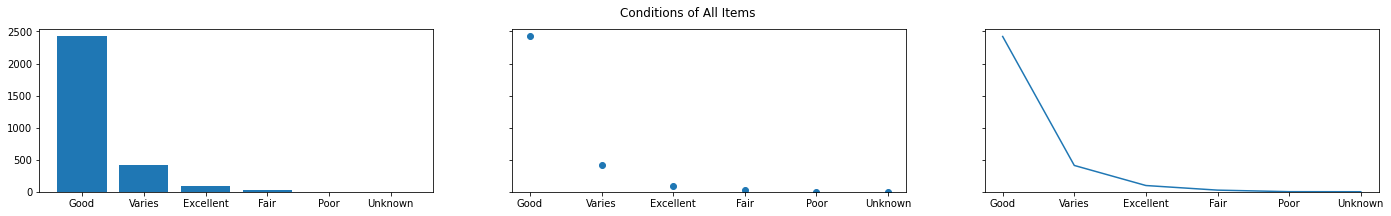

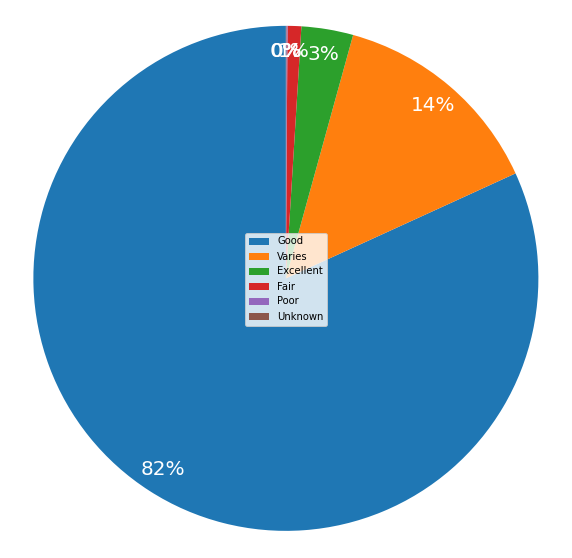

In [22]:
# Change column data types
data.Price = pd.to_numeric(data.Price.str.replace("$","",regex=True).replace(",","",regex=True))
data['Item Number'] = pd.to_numeric(data['Item Number'])
# data.Qty = pd.to_numeric(data.Qty)
data.Qty = data.Qty.apply(lambda x: int(x))
data.Condition = data.Condition.str.capitalize()
a = data.copy()

# repeat rows based on quantity
data = data.reindex(data.index.repeat(data.Qty)).reset_index().drop(['index','Qty'], axis=1)

print(
"""
CONDITION OF ITEMS

PLOT: ITEMS BASED ON CONDITION
"""
)

names = data['Condition'].value_counts().reset_index()['index']
values = data['Condition'].value_counts().reset_index()['Condition']

fig, axs = plt.subplots(1, 3, figsize=(24, 3), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Conditions of All Items')

fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(values, autopct='%1.0f%%', startangle=90,textprops={'color':"w",'fontsize': 20},pctdistance=0.9)
ax1.axis('equal')
plt.legend(names, loc="center")

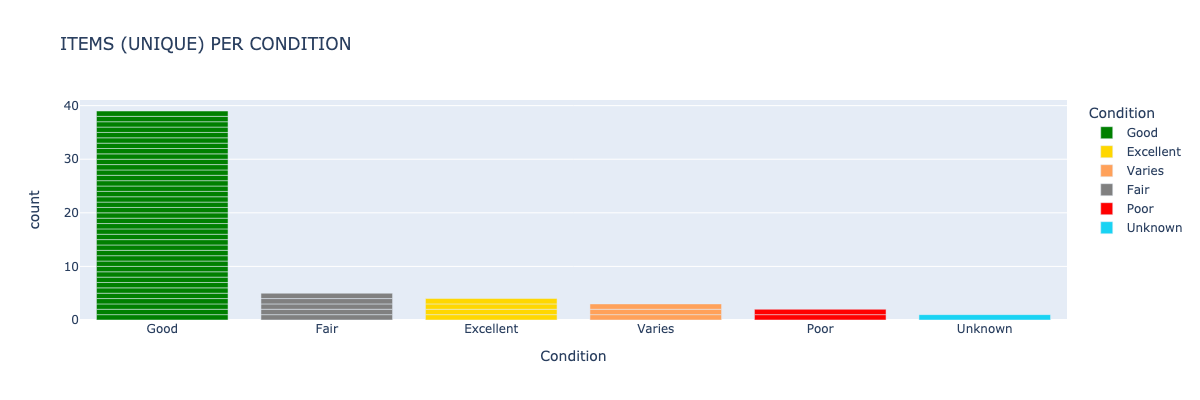

In [23]:

fig = px.bar(
    a,
    # y='Price',
    x='Condition',
    color='Condition',
    color_discrete_map={'Good':'green','Fair':'gray','Excellent':'gold','Poor':'red'},
    title="ITEMS (UNIQUE) PER CONDITION",
    width=1200, height=400
    )

fig.update_layout(xaxis={'categoryorder':'total descending'})

fig.show('png')


In [10]:
print('TABLE: ITEMS AMOUNT PER CONDITION')
data['Condition'].value_counts()

TABLE: ITEMS AMOUNT PER CONDITION


Good         2780
Varies        528
Excellent      97
Fair           72
Unknown         1
Poor            1
Name: Condition, dtype: int64

In [11]:
# Top 10 expensive items - overall
print(
"""
TOP 10 MOST EXPENSIVE ITEMS
"""
)

a = data.sort_values('Price',ascending=False).head(10)[['Description','Price','Condition']].reset_index().drop('index',axis=1)
a


TOP 10 MOST EXPENSIVE ITEMS



,Description,Price,Condition
0,"2017 Chevrolet Colorado ex cab 2wd, 2.5 auto e...",21995.00,Good
1,"Electrolux Professional Ag, Ch-6210 Sursee Til...",13125.00,Good
2,Morgana Digifold Pro Folding/Scoring Machine,7500.00,Fair
3,Electric Pie Press with extras,2250.00,Good
4,"Homack 2008 tool box 41"" blue Homack tool box",995.00,Good
5,Ice Dispenser,768.75,Good
6,BKI Free Standing Fry Dump Station or Food Wa...,525.00,Good
7,2018 MacBook Pro,400.00,Fair
8,2018 MacBook Pro,400.00,Fair
9,2018 MacBook Pro,400.00,Fair


In [12]:
# Top 10 expensive items - overall
print(
"""
TOP 10 MOST EXPENSIVE ITEMS
"""
)

fig = px.bar(
    a,
    y='Description',
    x='Price',
    color='Condition',
    color_discrete_map={'Good':'green','Fair':'gray','Excellent':'gold'},
    orientation='h',
    title="TOP 10 MOST EXPENSIVE ITEMS",
    width=1200, height=400
    )

# fig.update_layout(yaxis={'categoryorder':'total ascending'})

fig.show()


TOP 10 MOST EXPENSIVE ITEMS



In [13]:
# Bottom 10 cheapest items - overall

print('TOP 10 CHEAPEST ITEMS')


a = data.sort_values('Price',ascending=False).tail(10)[['Description','Price','Condition']].reset_index().drop('index',axis=1)
a

TOP 10 CHEAPEST ITEMS


,Description,Price,Condition
0,"Coin Boxes - Pennies, Nickels, Dimes",0.5,Excellent
1,"Coin Boxes - Pennies, Nickels, Dimes",0.5,Excellent
2,"Coin Boxes - Pennies, Nickels, Dimes",0.5,Excellent
3,"Coin Boxes - Pennies, Nickels, Dimes",0.5,Excellent
4,"Coin Boxes - Pennies, Nickels, Dimes",0.5,Excellent
5,"Coin Boxes - Pennies, Nickels, Dimes",0.5,Excellent
6,"Coin Boxes - Pennies, Nickels, Dimes",0.5,Excellent
7,"Coin Boxes - Pennies, Nickels, Dimes",0.5,Excellent
8,"Coin Boxes - Pennies, Nickels, Dimes",0.5,Excellent
9,"Coin Boxes - Pennies, Nickels, Dimes",0.5,Excellent


In [14]:
# Bottom 10 expensive items - overall

print('TOP 10 CHEAPEST ITEMS')

fig = px.bar(
    a,
    y='Description',
    x='Price',
    color='Condition',
    color_discrete_map={'Good':'green','Fair':'gray','Excellent':'gold','Poor':'red'},
    orientation='h',
    title='TOP 10 CHEAPEST ITEMS',
    width=1200, height=400
    )

# fig.update_layout(yaxis={'categoryorder':'total ascending'})

fig.show()

TOP 10 CHEAPEST ITEMS


In [15]:
# Top 10 highest price items - with Excellent condition

print('Top 10 highest price items - with Excellent condition')

data[
    (~data.Description.duplicated()) & # remove duplicates
    (data.Condition == 'Excellent') # filter by condition = Excellent
].sort_values('Price',ascending=False).head(10)[ # top 10
    ['Description','Price','Condition'] # select columns 
].reset_index().drop('index',axis=1) # reset index

Top 10 highest price items - with Excellent condition


,Description,Price,Condition
0,Labconco Paramount Filtered Enclosure stand,250.0,Excellent
1,Sold by the case furnace filters,8.0,Excellent
2,"Coin Boxes - Pennies, Nickels, Dimes",0.5,Excellent


In [16]:
# Top 10 higest price items - with Good condition

print('Top 10 higest price items - with \'Good\' condition \n')

data[
    (~data.Description.duplicated()) & # remove duplicates
    (data.Condition == 'Good') # filter by condition = Excellent
].sort_values('Price',ascending=False).head(10)[ # top 10
    ['Description','Price','Condition'] # select columns 
].reset_index().drop('index',axis=1) # reset index


Top 10 higest price items - with 'Good' condition 



,Description,Price,Condition
0,"2017 Chevrolet Colorado ex cab 2wd, 2.5 auto e...",21995.00,Good
1,"Electrolux Professional Ag, Ch-6210 Sursee Til...",13125.00,Good
2,Electric Pie Press with extras,2250.00,Good
3,"Homack 2008 tool box 41"" blue Homack tool box",995.00,Good
4,Ice Dispenser,768.75,Good
5,BKI Free Standing Fry Dump Station or Food Wa...,525.00,Good
6,Duke Tray Warmer,243.75,Good
7,Dual Drawer Toast Master,180.00,Good
8,Chick-fil-A Sandwich and Fry Display,121.25,Good
9,Fry Catch Basin,118.75,Good


In [17]:
# If they were to sell all the items, how much money would they have?

all_items       = "${:,.2f}".format(data.Price.sum())
excellent_items = "${:,.2f}".format(data[data.Condition=='Excellent']['Price'].sum())
good_items      = "${:,.2f}".format(data[data.Condition=='Good']['Price'].sum())
fair_items      = "${:,.2f}".format(data[data.Condition=='Fair']['Price'].sum())
poor_items      = "${:,.2f}".format(data[data.Condition=='Poor']['Price'].sum())
varies_items    = "${:,.2f}".format(data[data.Condition=='Varies']['Price'].sum())
unknown_items   = "${:,.2f}".format(data[data.Condition=='Unknown']['Price'].sum())

print(f"""
IF WERE TO SELL ALL ITEMS

Sell from all items:\t\t{all_items}

Sell from Excellent items:\t{excellent_items}
Sell from Good items:\t\t{good_items}
Sell from Fair items:\t\t{fair_items}
Sell from Poor items:\t\t{poor_items}
Sell from Varies items:\t\t{varies_items}
Sell from Unknown items:\t{unknown_items}
""")



IF WERE TO SELL ALL ITEMS

Sell from all items:		$66,767.75

Sell from Excellent items:	$433.00
Sell from Good items:		$48,922.25
Sell from Fair items:		$16,858.75
Sell from Poor items:		$25.00
Sell from Varies items:		$528.00
Sell from Unknown items:	$0.75

